<a href="https://colab.research.google.com/github/igorcabralbr/pandas_analise_mercado/blob/main/projeto_indices_pandemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.0 - Bibliotecas

In [16]:
!pip install yfinance --upgrade --no-cache-dir

In [17]:
import yfinance as yf

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2.0 Carrega dados

In [19]:
#'carteira' com Indices 
tickers = "^IXIC ^DJI ^GSPC ^N225 ^GDAXI ^FTSE ^HSI"                   
mundo = yf.download(tickers, start="2019-10-01", end="2021-08-01")["Adj Close"]
# indice Ibov
ibov = yf.download("^BVSP", start="2019-10-01", end="2021-08-01")["Adj Close"]

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed


In [20]:
mundo.dropna(inplace=True)
mundo

,^DJI,^FTSE,^GDAXI,^GSPC,^HSI,^IXIC,^N225
Date,,,,,,,
2019-10-02,26078.619141,7122.500000,11925.250000,2887.610107,26042.689453,7785.250000,21778.609375
2019-10-04,26573.720703,7155.399902,12012.809570,2952.010010,25821.029297,7982.470215,21410.199219
2019-10-08,26164.039062,7143.200195,11970.200195,2893.060059,25893.400391,7823.779785,21587.779297
2019-10-09,26346.009766,7166.500000,12094.259766,2919.399902,25682.810547,7903.740234,21456.380859
2019-10-10,26496.669922,7186.399902,12164.200195,2938.129883,25707.929688,7950.779785,21551.980469
...,...,...,...,...,...,...,...
2021-07-26,35144.308594,7025.399902,15618.980469,4422.299805,26192.320312,14840.709961,27833.289062
2021-07-27,35058.519531,6996.100098,15519.129883,4401.459961,25086.429688,14660.580078,27970.220703
2021-07-28,34930.929688,7016.600098,15570.360352,4400.640137,25473.880859,14762.580078,27581.660156


In [21]:
mundo.rename(columns ={'^IXIC':'NASDAQ', '^DJI':'DOW JONES','^GSPC':'S&P 500','^N225':'NIKKEI','^GDAXI':'DAX','^FTSE':'FTSE 100','^HSI':'HANG SENG'},inplace = True)
mundo

,DOW JONES,FTSE 100,DAX,S&P 500,HANG SENG,NASDAQ,NIKKEI
Date,,,,,,,
2019-10-02,26078.619141,7122.500000,11925.250000,2887.610107,26042.689453,7785.250000,21778.609375
2019-10-04,26573.720703,7155.399902,12012.809570,2952.010010,25821.029297,7982.470215,21410.199219
2019-10-08,26164.039062,7143.200195,11970.200195,2893.060059,25893.400391,7823.779785,21587.779297
2019-10-09,26346.009766,7166.500000,12094.259766,2919.399902,25682.810547,7903.740234,21456.380859
2019-10-10,26496.669922,7186.399902,12164.200195,2938.129883,25707.929688,7950.779785,21551.980469
...,...,...,...,...,...,...,...
2021-07-26,35144.308594,7025.399902,15618.980469,4422.299805,26192.320312,14840.709961,27833.289062
2021-07-27,35058.519531,6996.100098,15519.129883,4401.459961,25086.429688,14660.580078,27970.220703
2021-07-28,34930.929688,7016.600098,15570.360352,4400.640137,25473.880859,14762.580078,27581.660156


In [22]:
ibov.dropna(inplace=True)
ibov

Date
2019-10-01    104053.0
2019-10-02    101031.0
2019-10-03    101516.0
2019-10-04    102551.0
2019-10-07    100573.0
                ...   
2021-07-26    126004.0
2021-07-27    124612.0
2021-07-28    126286.0
2021-07-29    125675.0
2021-07-30    121801.0
Name: Adj Close, Length: 450, dtype: float64

3.0 Inicio graficos

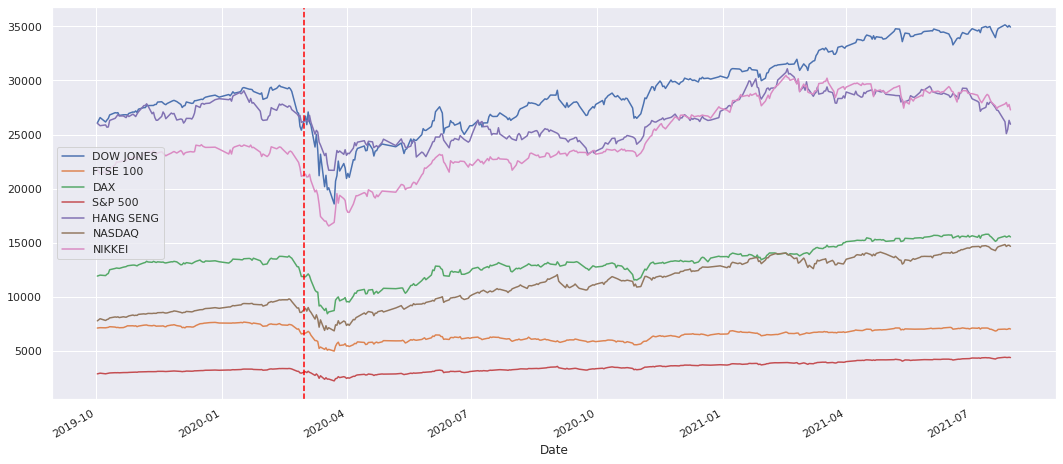

In [23]:
sns.set()
ax = mundo.plot(figsize=(18,8));
ax.axvline("2020-03-01", color="red", linestyle="dashed")

In [24]:
mundo_norm = (mundo / mundo.iloc[0])
mundo_norm.dropna(inplace=True)

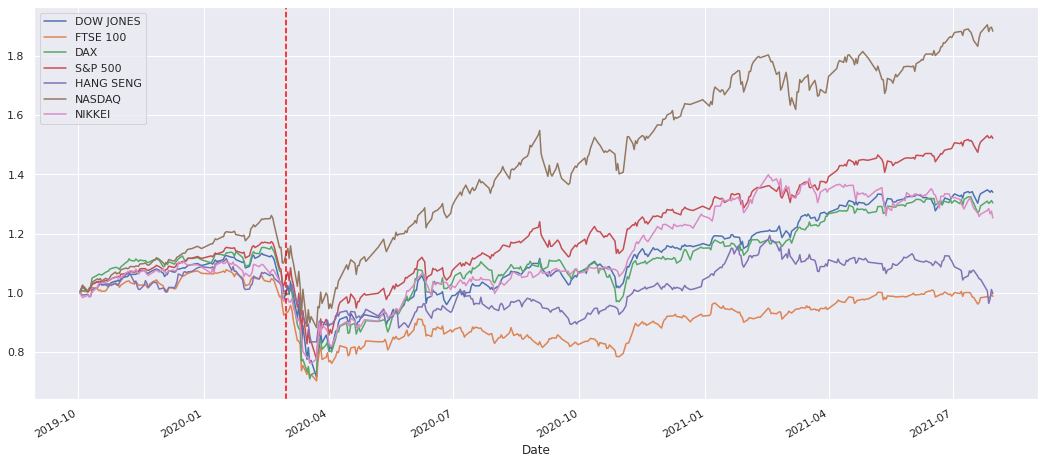

In [25]:
ax=mundo_norm.plot(figsize=(18,8));
ax.axvline("2020-03-01", color="red", linestyle="dashed")

In [26]:
mundo_norm.dropna(inplace=True)

In [27]:
mundo_norm["total"] = (mundo_norm.sum(axis=1))/7

In [28]:
mundo_norm

,DOW JONES,FTSE 100,DAX,S&P 500,HANG SENG,NASDAQ,NIKKEI,total
Date,,,,,,,,
2019-10-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-10-04,1.018985,1.004619,1.007342,1.022302,0.991489,1.025333,0.983084,1.007593
2019-10-08,1.003275,1.002906,1.003769,1.001887,0.994268,1.004949,0.991238,1.000328
2019-10-09,1.010253,1.006178,1.014172,1.011009,0.986181,1.015220,0.985204,1.004031
2019-10-10,1.016030,1.008972,1.020037,1.017495,0.987146,1.021262,0.989594,1.008648
...,...,...,...,...,...,...,...,...
2021-07-26,1.347629,0.986367,1.309740,1.531474,1.005746,1.906260,1.278010,1.337890
2021-07-27,1.344340,0.982253,1.301367,1.524257,0.963281,1.883123,1.284298,1.326131
2021-07-28,1.339447,0.985132,1.305663,1.523973,0.978159,1.896224,1.266456,1.327865


In [29]:
ibov_norm = (ibov / ibov.iloc[0])
ibov_norm

Date
2019-10-01    1.000000
2019-10-02    0.970957
2019-10-03    0.975618
2019-10-04    0.985565
2019-10-07    0.966556
                ...   
2021-07-26    1.210960
2021-07-27    1.197582
2021-07-28    1.213670
2021-07-29    1.207798
2021-07-30    1.170567
Name: Adj Close, Length: 450, dtype: float64

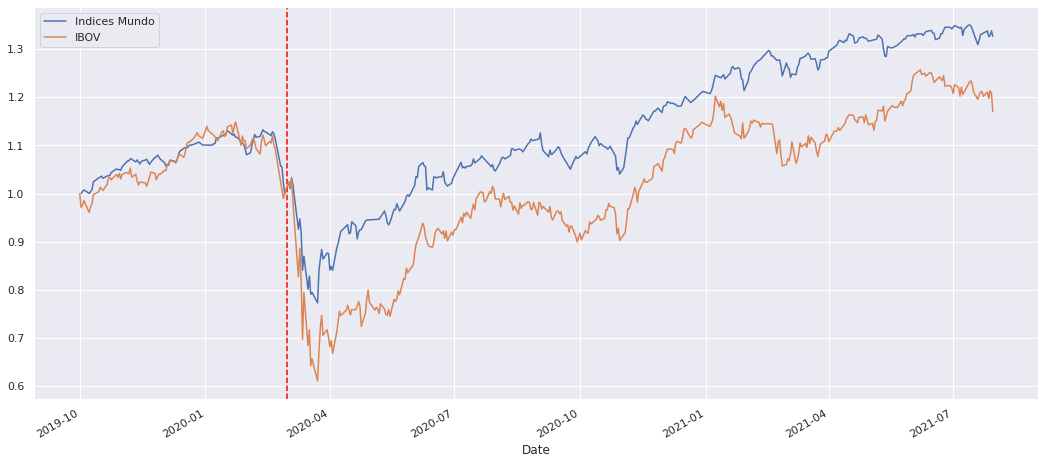

In [30]:
ax=mundo_norm["total"].plot(figsize=(18,8), label="Indices Mundo")
ax.axvline("2020-03-01", color="red", linestyle="dashed")
ibov_norm.plot(label="IBOV")
plt.legend();